# How-to use a RooFit PDF

This demonstrates the use of the wrapper function `convert_rf_pdf`, which converts a fitted RooAbsPdf into a callable that our package can use.

To run this example, you need to install ROOT. The easiest way is to use conda (or better mamba). You can install it like this:

`mamba install -c conda-forge root`

We make a dummy RooFit model.

In [2]:
import ROOT as R
import ROOT.RooFit as RF

# observable
mass = R.RooRealVar("m", "m", 5000, 5800)

# gaussian
mean = R.RooRealVar("mu", "mu", 5350, 5300, 5400)
sigma = R.RooRealVar("sg", "sg", 25, 1e-3, 100)
spdf = R.RooGaussian("sig", "sig", mass, mean, sigma)

# exponential
slope = R.RooRealVar("lb", "lb", -0.002, -0.01, 0)
bpdf = R.RooExponential("bkg", "bkg", mass, slope)

# total
sy = R.RooRealVar("sy", "sy", 1000, 0, 10000)
by = R.RooRealVar("by", "by", 2000, 0, 10000)
pdf = R.RooAddPdf("pdf", "pdf", (spdf, bpdf), (sy, by))

We plot the dummy model using RooFit commands.

[#1] INFO:Plotting -- RooAbsPdf::plotOn(pdf) directly selected PDF components: (bkg)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(pdf) indirectly selected PDF components: ()
[#1] INFO:Plotting -- RooAbsPdf::plotOn(pdf) directly selected PDF components: (sig)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(pdf) indirectly selected PDF components: ()


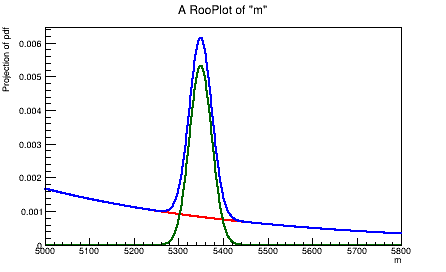

In [3]:
c = R.TCanvas('c','c',450,300)
pl = mass.frame(RF.Bins(800))
pdf.plotOn(
    pl,
    RF.Normalization(1, R.RooAbsReal.NumEvent),
    RF.Precision(-1),
    RF.Components("bkg"),
    RF.LineColor(R.kRed),
    RF.LineStyle(2),
    RF.LineWidth(2)
)
pdf.plotOn(
    pl,
    RF.Normalization(1, R.RooAbsReal.NumEvent),
    RF.Precision(-1),
    RF.Components("sig"),
    RF.LineColor(R.kGreen + 3),
    RF.LineWidth(2)
)
pdf.plotOn(pl, RF.Normalization(1, R.RooAbsReal.NumEvent), RF.Precision(-1), RF.LineWidth(2))
pl.Draw()
c.Draw()

Now convert the RooFit PDF object into a simple Python callable.

In [4]:
from sweights.util import convert_rf_pdf

spdf_py = convert_rf_pdf(spdf, mass)
bpdf_py = convert_rf_pdf(bpdf, mass)
pdf_py = convert_rf_pdf(pdf, mass)

You can now use these pdfs in the `SWeight` and `Cow` objects. We just draw them with matplotlib here, to show that the pdfs work.

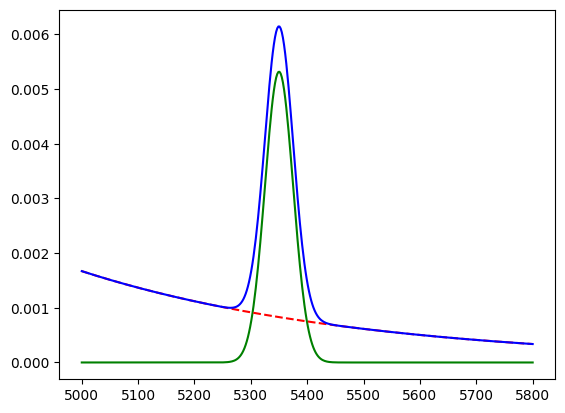

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# we normalize the yields to match the way RooFit plots the pdf.
fs = sy.getVal() / (sy.getVal() + by.getVal())
fb = by.getVal() / (sy.getVal() + by.getVal())

x = np.linspace(mass.getMin(), mass.getMax(), 400)
plt.plot(x, fs * spdf_py(x), "g-");
plt.plot(x, fb * bpdf_py(x), "r--");
plt.plot(x, pdf_py(x), "b-");

We get the same result.